In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


## distance tabanlı yöntemlerde scale etmek gerekiyordu.

In [7]:
sc = MinMaxScaler((0, 1))          # 0 ila 1 arasına getir dedik.

In [8]:
df = sc.fit_transform(df)     # bu artık numpy array'i head'ine bakamayız !!!

In [9]:
# df.head()

In [10]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [11]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)       # df = X

C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [13]:
kmeans.n_clusters

4

In [14]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

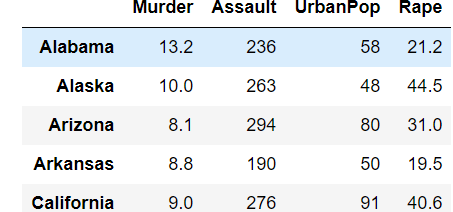

In [15]:
kmeans.labels_         # kümeler.

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

## SSD : ? :

In [16]:
kmeans.inertia_

3.683456153585913

## inertia : en yakın cluster'a olan uzaklıklar toplamı.

## optimum küme sayım ne olmalı ? 

In [17]:
kmeans = KMeans() 

In [18]:
ssd = []
K = range(2, 9)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_

In [19]:
ssd

[6.5968938679461955,
 5.016388924690672,
 3.683456153585913,
 3.1831577316766535,
 2.911540529211979,
 2.5547180063279225,
 2.3997771778491934]

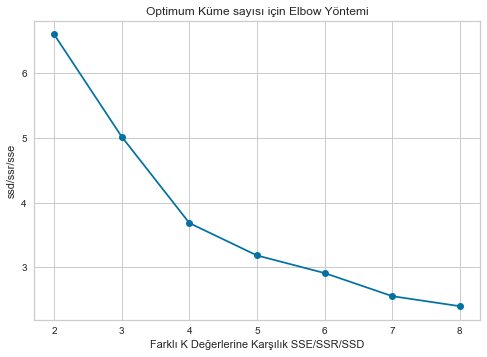

In [23]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.ylabel("ssd/ssr/sse")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

## gözlem birimi kadar cluster olsa zaten hatam 0 olur her bir gözlem birimi merkez olur bundan dolayı küme sayısı arttıkça zaten hatanın düşmesini bekleriz.

C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_

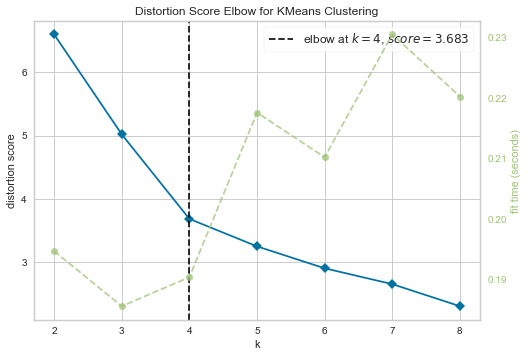

In [21]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

# SSE = SSD = SSR = Distortion Score

In [22]:
visualizer.elbow_value_

4

In [24]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit(df)

C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
kmeans.n_clusters

4

In [26]:
kmeans.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [27]:
kmeans.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [28]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [29]:
clusters_kmeans = kmeans.labels_

In [31]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [32]:
df["cluster"] = clusters_kmeans

In [33]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3


In [39]:
df["cluster"] = df["cluster"] + 1            # 0 bizi rahatsız ediyorsa mesela böyle yapılabilir.

In [40]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,5


In [42]:
df[df["cluster"]==3]                   # şu cluster'da kimler var diye bakabilirim mesela

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Arkansas,8.8,190,50,19.5,3
Georgia,17.4,211,60,25.8,3
Louisiana,15.4,249,66,22.2,3
Mississippi,16.1,259,44,17.1,3
North Carolina,13.0,337,45,16.1,3
South Carolina,14.4,279,48,22.5,3
Tennessee,13.2,188,59,26.9,3


In [43]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
2           17   5.852941    6.0      17  141.176471  149.0       17   
3            8  13.937500   13.8       8  243.625000  242.5        8   
4           13   3.600000    2.6      13   78.538462   81.0       13   
5           12  10.966667   11.2      12  264.000000  259.0       12   

                           Rape                    
              mean median count       mean median  
cluster                                            
2        73.647059   72.0    17  19.335294   20.0  
3        53.750000   54.0     8  21.412500   21.7  
4        52.076923   53.0    13  12.176923   11.3  
5        76.500000   80.0    12  33.608333   32.0

# buna bakarak da küme sayısını sonradan arayabilirim mesela ortalamaları vs aynı bunlar aynı kümede olabilir diye yani SADECE ALGORİTMANIN BANA VERDİĞİNE BAKMAYACAĞIZ ÇIKAN KÜMELERİ VE KÜMELERİN İÇİNDEKİLERDE İNCELENEBİLİR GEREKİRSE.

In [38]:
df.to_csv("clusters.csv")